In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("concat_data.csv",low_memory =False)

In [28]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [29]:
df.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종명,출생년도,성별코드,거래건수,총거래금액,age,age_range,요일
0,2022-06-01,0,중구,대청동,코나,편 의 점,1973,M,1,7350,50,50,Wednesday
1,2022-06-01,0,중구,중앙동,부산,편 의 점,1981,F,1,3700,42,40,Wednesday
2,2022-06-01,0,중구,중앙동,부산,편 의 점,1992,M,1,7500,31,30,Wednesday
3,2022-06-01,0,중구,중앙동,부산,편 의 점,1995,M,1,2700,28,20,Wednesday
4,2022-06-01,0,중구,중앙동,코나,편 의 점,1976,M,1,13900,47,40,Wednesday


In [30]:
# 거래 합산 평균 금액
df['건별거래금액'] = df['총거래금액']/df['거래건수']
len(df)

27135019

In [31]:
df.drop(df[(df['건별거래금액'] < 10)].index, inplace=True)
len(df)

27134908

In [32]:
# 27135019-27134908 = 111행 삭제됨!

In [33]:
# 요일별 거래 건수 합계
sum_of_day = df.groupby('요일')['거래건수'].agg(**{'요일별거래건수':'sum'})

In [34]:
sum_of_day

,요일별거래건수
요일,
Friday,4737165
Monday,4059000
Saturday,4599100
Sunday,3399237
Thursday,4395742
Tuesday,4142812
Wednesday,4593574


In [35]:
# x축 라벨 순서 변경
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sum_of_day = sum_of_day.loc[weekday_order]

<Axes: xlabel='요일', ylabel='요일별거래건수'>

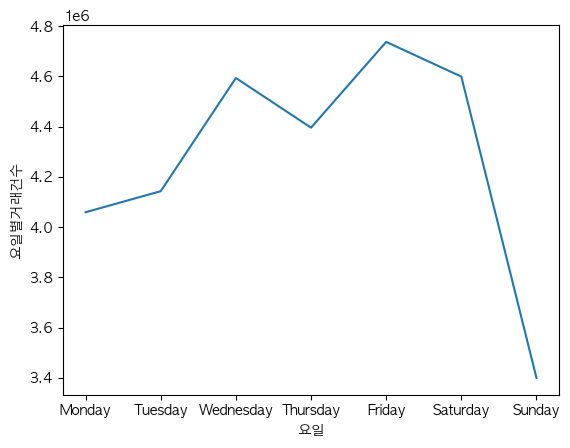

In [134]:
from matplotlib import rc
#맥북용
plt.rcdefaults()
rc('font', family='AppleGothic') ## 한글 글씨
plt.rcParams['axes.unicode_minus'] = False  ## 한글 글씨 
sns.lineplot(data=sum_of_day, x = '요일', y = '요일별거래건수')

In [37]:
spend_of_day = df.groupby('요일')['총거래금액'].agg(**{'요일별거래총액':'sum'})
spend_of_day

,요일별거래총액
요일,
Friday,99890486392
Monday,79660973982
Saturday,100364834957
Sunday,65716402979
Thursday,88046141705
Tuesday,82288952796
Wednesday,91091221892


In [38]:
spend_of_day = spend_of_day.loc[weekday_order]

<Axes: xlabel='요일', ylabel='요일별거래총액'>

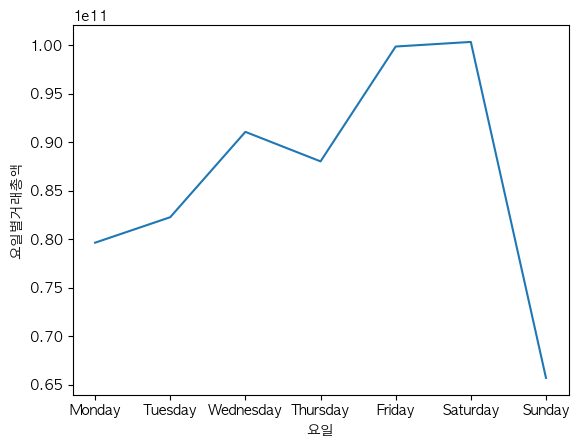

In [39]:
sns.lineplot(data=spend_of_day, x = '요일', y = '요일별거래총액')

### 일요일 총 거래건수 최하, 거래 금액 최하 -> 많이 쓰는 날은 의외로 평일. 금토

In [40]:
# 최다 방문 업종, 최대 구매 업종

In [135]:
s_grouped = df.groupby('업종명')
store_visit = s_grouped['거래건수'].agg(**{'업종별방문수':'sum'})
store_visit

,업종별방문수
업종명,
1급 호텔,1078
2급 호텔,1097
DP&E,18901
DVD음반테이프 판매,1241
GS 가스충전소,10522
...,...
화랑,1525
화물운송,1497
화방표구점,527


In [42]:
# 사람들이 많이 방문하는 업종명은 편의점, 서양음식, 일반한식, 슈퍼마켓
store_visit.sort_values(by = ['업종별방문수'], ascending = False).head(10)

,업종별방문수
업종명,
편 의 점,4741857
서양음식,4711704
일반한식,4108499
슈퍼마켓,3676603
약국,1400609
스넥,1221037
기타음료식품,1061496
제과점,936430
의원,931727


In [43]:
# 지역화폐 매출이 많은 업종은 일반한식>슈퍼마켓>서양음식>편의점>의원.
store_sum = s_grouped['총거래금액'].agg(**{'업종별총거래금액':'sum'})
store_sum.sort_values(by = ['업종별총거래금액'], ascending = False).head(10)

,업종별총거래금액
업종명,
일반한식,126341864643
슈퍼마켓,44751636733
서양음식,37458268091
편 의 점,31165441995
의원,26531713206
보습학원,23222737754
약국,20461505658
스넥,17303185170
농축수산품,15481140371


In [44]:
# 평균 결제 금액이 높은 업종?
store_mean = s_grouped['총거래금액'].agg(**{'업종별총거래금액':'mean'})
store_mean.sort_values(by = ['업종별총거래금액'], ascending = False).head(10)

,업종별총거래금액
업종명,
초중고교육기관,397958.333333
유치원,392034.862385
유학원,357941.715728
산후조리원,351432.158568
냉열기기,310104.154846
보습학원,283948.618377
일반가구,282188.949383
외국어학원,279215.609494
학원,256352.693617


In [45]:
# 의외로!! 교육 기관이 건 별 구매 금액이 높은 경향이 있다.

In [46]:
# 거래 시간 별 많이 방문한 업종
time_store = df.groupby(['기준시간대값', '업종명'])['거래건수'].agg(**{'거래시간별업종방문수':'sum'})
time_store

거래시간별업종방문수
기준시간대값 업종명                   
0      2급 호텔               11
       DP&E               138
       GS 가스충전소            50
       GS주유소              697
       SK가스충전소            421
...                       ...
23     헬스클럽               229
       현대정유(오일뱅크)        1069
       홍삼제품                 3
       화원                   9
       화장품                 43

[3780 rows x 1 columns]

In [78]:
time_store.max()

거래시간별업종방문수    676425
dtype: int64

## 지역별 인구 수를 고려하여 지역화폐 이용률 다시 보기

In [62]:
population = pd.read_csv("busan_population.csv",encoding = 'cp949',low_memory =False)

In [63]:
population = population.set_index('region')

In [68]:
population['avg'] = population.mean(axis = 'columns')

In [72]:
avg_sum = population['avg'].sum()

In [76]:
population['ratio'] = population['avg']/avg_sum*100

In [77]:
population 

,june,july,august,avg,ratio
region,,,,,
중구,42692,42594,42455,42580.333333,1.259471
서구,106397,106818,107522,106912.333333,3.162329
동구,90186,89944,89800,89976.666667,2.661394
영도구,111307,111271,111100,111226.000000,3.289922
부산진구,353674,354120,354367,354053.666667,10.472452
동래구,275668,275956,275830,275818.000000,8.158342
남구,265158,264557,264112,264609.000000,7.826794
북구,282625,282381,282230,282412.000000,8.353384
해운대구,396120,395601,394626,395449.000000,11.696873


In [80]:
r_grouped = df.groupby('시군구명')['총거래금액'].agg(**{'군구별거래총액':'sum'})
r_grouped

,군구별거래총액
시군구명,
강서구,34963748437
금정구,43720794432
기장군,25287288611
남구,39154012181
동구,13665932993
동래구,59533604982
부산진구,80424025716
북구,44494161689
사상구,32893793978


In [84]:
region_sum = r_grouped['군구별거래총액'].sum()
r_grouped['ratio'] = r_grouped['군구별거래총액']/region_sum*100
r_grouped

,군구별거래총액,ratio
시군구명,,
강서구,34963748437,5.759530
금정구,43720794432,7.202067
기장군,25287288611,4.165540
남구,39154012181,6.449787
동구,13665932993,2.251170
동래구,59533604982,9.806889
부산진구,80424025716,13.248140
북구,44494161689,7.329462
사상구,32893793978,5.418550


In [128]:
region_ratio = pd.DataFrame ({'인구비율': population.ratio, 
                   '거래량비율': r_grouped.ratio})
region_ratio = region_ratio.reset_index()
region_ratio

,index,인구비율,거래량비율
0,강서구,4.392981,5.759530
1,금정구,6.738218,7.202067
2,기장군,5.316054,4.165540
3,남구,7.826794,6.449787
4,동구,2.661394,2.251170
5,동래구,8.158342,9.806889
6,부산진구,10.472452,13.248140
7,북구,8.353384,7.329462
8,사상구,6.204273,5.418550
9,사하구,9.132546,7.046658


<Axes: xlabel='index'>

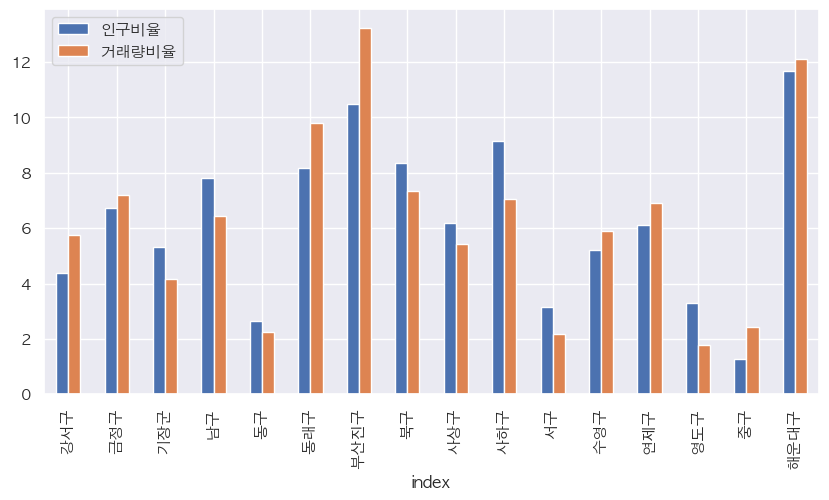

In [130]:
region_ratio.plot( x='index', y=['인구비율','거래량비율'], kind='bar', figsize=(10,5))

In [139]:
region_ratio['차이'] = region_ratio['거래량비율'] - region_ratio['인구비율']
region_ratio

,index,인구비율,거래량비율,차이
0,강서구,4.392981,5.759530,1.366549
1,금정구,6.738218,7.202067,0.463848
2,기장군,5.316054,4.165540,-1.150514
3,남구,7.826794,6.449787,-1.377007
4,동구,2.661394,2.251170,-0.410224
5,동래구,8.158342,9.806889,1.648548
6,부산진구,10.472452,13.248140,2.775688
7,북구,8.353384,7.329462,-1.023921
8,사상구,6.204273,5.418550,-0.785724
9,사하구,9.132546,7.046658,-2.085888


<Axes: xlabel='index'>

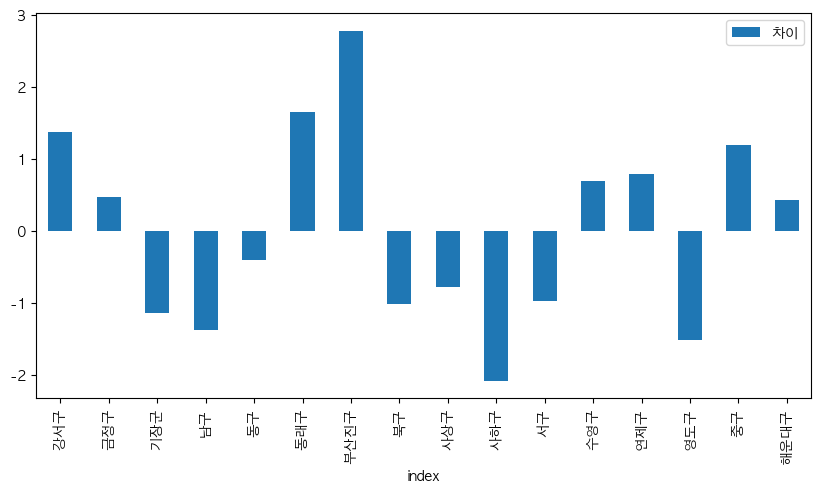

In [140]:
region_ratio.plot( x='index', y=['차이'], kind='bar', figsize=(10,5))